In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/Users/shencong/youtube/CAvideos.csv")
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [2]:
import string

In [3]:
data['title_word']=data["title"].apply(lambda x: str(x).split())

In [4]:
data['firstword']=data['title_word'].apply(lambda x:x[0])

In [5]:
#define >5000 as high_views

In [6]:
data['high_views'] =data['views'].apply(lambda x: int(1) if x>=5000 else int(0))

In [7]:
data['count_words_upper']=data['title'].apply(lambda x: len([f for f in str(x).split() if f.isupper()]))
data['count_words_upper']

0        0
1        1
2        0
3        3
4        0
        ..
40876    1
40877    0
40878    7
40879    0
40880    0
Name: count_words_upper, Length: 40881, dtype: int64

In [8]:
#The percentage of clickbait words

In [9]:
data["count_words_upper%"] = data["title"].apply(lambda x: len([f for f in str(x).split() if f.isupper()])/len(str(x).split()))
data['count_words_upper%']

0        0.000000
1        0.166667
2        0.000000
3        0.600000
4        0.000000
           ...   
40876    0.166667
40877    0.000000
40878    0.700000
40879    0.000000
40880    0.000000
Name: count_words_upper%, Length: 40881, dtype: float64

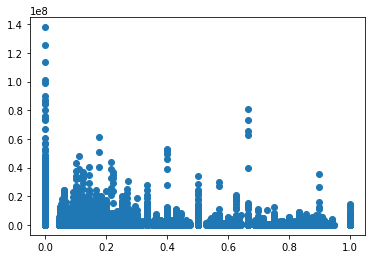

In [10]:
x=data['count_words_upper%']
y=data['views']
plt.scatter(x,y)

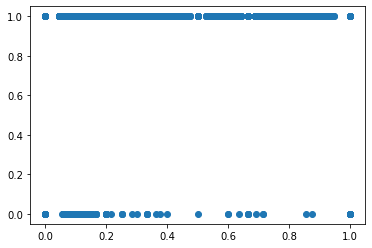

In [11]:
x=data['count_words_upper%']
y=data['high_views']
plt.scatter(x,y)

In [12]:
data['high_views'].value_counts()

1    40573
0      308
Name: high_views, dtype: int64

In [13]:
data['count_words_upper%'].value_counts()

0.000000    20674
1.000000     1474
0.200000     1255
0.166667     1024
0.125000     1017
            ...  
0.842105        1
0.368421        1
0.562500        1
0.772727        1
0.611111        1
Name: count_words_upper%, Length: 136, dtype: int64

In [14]:
data1=data.loc[(data["high_views"] == 1)]

(array([24576.,  5627.,  3666.,  1067.,   779.,  1177.,   601.,   447.,
          957.,  1676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

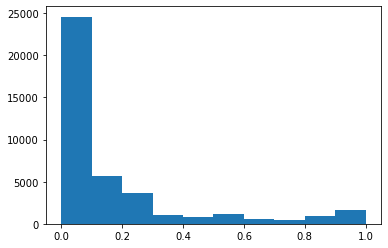

In [15]:
plt.hist(data1['count_words_upper%'])

In [16]:
data0=data.loc[(data["high_views"] == 0)]

(array([235.,  31.,  13.,   6.,   1.,   3.,   6.,   2.,   2.,   9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

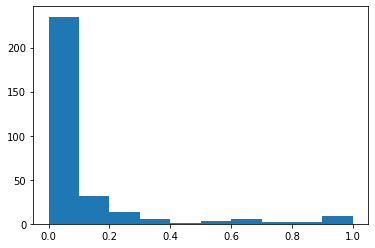

In [17]:
plt.hist(data0['count_words_upper%'])

In [18]:
data0

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_word,firstword,high_views,count_words_upper,count_words_upper%
42,t3FYESkzjUI,17.14.11,Emotionally Responsive Digital Human,Soul Machines,22,2017-10-31T01:11:48.000Z,"artificial intelligence|""digital human""|""virtu...",3684,4,5,...,https://i.ytimg.com/vi/t3FYESkzjUI/default.jpg,False,False,False,Soul Machines is making machines more human,"[Emotionally, Responsive, Digital, Human]",Emotionally,0,0,0.000000
313,8sdQ7dP9Drs,17.15.11,"Today's News: It's On - Get The Goods, Novembe...",Whistler Blackcomb,17,2017-11-14T18:18:21.000Z,[none],4851,31,0,...,https://i.ytimg.com/vi/8sdQ7dP9Drs/default.jpg,False,False,False,Today’s news: it’s on. Whistler Mountain will ...,"[Today's, News:, It's, On, -, Get, The, Goods,...",Today's,0,0,0.000000
385,ClwBTkLiivk,17.15.11,Week 4 Challenge: Check out “My Email Leads”,CREA | ACI,29,2017-11-13T13:46:37.000Z,CREA,1898,0,0,...,https://i.ytimg.com/vi/ClwBTkLiivk/default.jpg,True,False,False,www.realtor.ca/2mins,"[Week, 4, Challenge:, Check, out, “My, Email, ...",Week,0,0,0.000000
510,IkQhv4qzbc4,17.16.11,Decades of memories gone,Castanet News,25,2017-11-14T22:06:48.000Z,"Decades of memories gone|""YouTube Ends""",3663,2,0,...,https://i.ytimg.com/vi/IkQhv4qzbc4/default.jpg,False,False,False,A lady in Kelowna spent hours on Christmas pot...,"[Decades, of, memories, gone]",Decades,0,0,0.000000
579,0ayARJdf7I4,17.16.11,018 Algebra Lineal 18-10-2011,udearroba,27,2017-11-15T18:20:06.000Z,[none],1141,0,0,...,https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg,False,False,False,Base ortogonal,"[018, Algebra, Lineal, 18-10-2011]",018,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,JVTUsdSg6Do,18.13.05,NHL Players That Played Through Terrible Injur...,CanadianJock,17,2018-05-12T22:56:53.000Z,"NHL|""TheHockeyGuy""|""UrinatingTree""|""FivePointV...",3547,335,4,...,https://i.ytimg.com/vi/JVTUsdSg6Do/default.jpg,False,False,False,NHL Injuries in the playoffs for the Stanley C...,"[NHL, Players, That, Played, Through, Terrible...",NHL,0,1,0.100000
34511,O0psVki3cKI,18.13.05,NBL Canada Finals Game 4 | Halifax Hurricanes ...,London Lightning,17,2018-05-13T03:14:14.000Z,[none],3684,22,4,...,https://i.ytimg.com/vi/O0psVki3cKI/default.jpg,False,False,False,NBL Canada Finals Game 4 | Halifax Hurricanes ...,"[NBL, Canada, Finals, Game, 4, |, Halifax, Hur...",NBL,0,1,0.066667
34625,bz91MAdY6FQ,18.14.05,''Gala Artis 2018'' Le numéro d'ouverture,mart lat,24,2018-05-14T00:43:35.000Z,"gala|""artis""|""2018""|""numéro d'ouverture""|""Yama...",733,10,4,...,https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg,False,False,False,Anim.: Maripier Morin et Jean-Philippe Dion. L...,"[''Gala, Artis, 2018'', Le, numéro, d'ouverture]",''Gala,0,0,0.000000
34629,FgF3ENGluoI,18.14.05,Who Will be the NEXT Raptors Head Coach?,Raptors Digest,17,2018-05-13T20:56:45.000Z,"raptors|""toronto""|""dwane""|""casey""|""mike""|""bud""...",2236,68,3,...,https://i.ytimg.com/vi/FgF3ENGluoI/default.jpg,False,False,False,Ben Rogers and Ryker Richard take a look at th...,"[Who, Will, be, the, NEXT, Raptors, Head, Coach?]",Who,0,1,0.125000


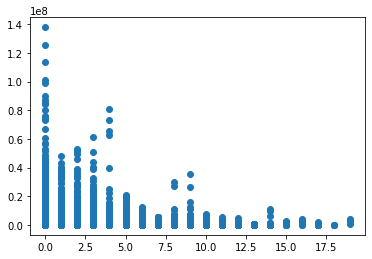

In [19]:
x=data['count_words_upper']
y=data['views']
plt.scatter(x,y)

In [20]:
data["count_punctuations"] =data["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [21]:
data['count_word']=data["title"].apply(lambda x: len(str(x).split()))

In [22]:
data["count_words_upper"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

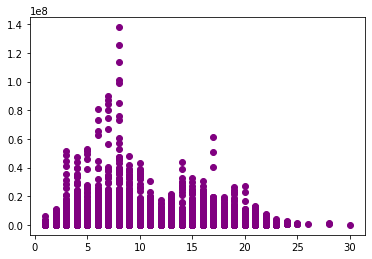

In [23]:
x = data['count_word']
y = data["views"]
plt.scatter(x, y, label='cosine', color='purple')

In [24]:
data["count_words_title"] = data["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

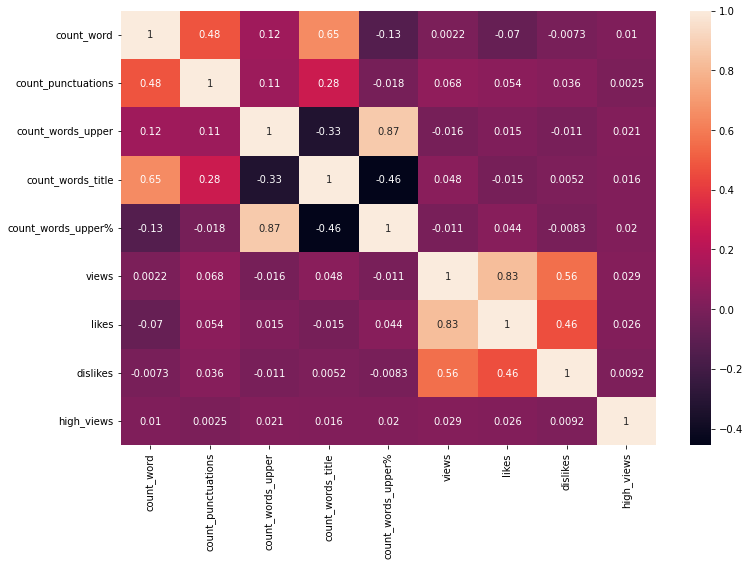

In [25]:
plt.figure(figsize = (12,8))
sns.heatmap(data[['count_word', "count_punctuations","count_words_upper", 'count_words_title','count_words_upper%','views', 'likes','dislikes','high_views']].corr(), annot=True)
plt.show()

In [26]:
x = data[['count_word', "count_punctuations","count_words_upper", 'count_words_title']]
y = data['views']

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (32704, 4)
x_test:  (8177, 4)
y_train:  (32704,)
y_test:  (8177,)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([1999235.43343769, 1269606.6242761 , 1077400.49663942, ...,
        844801.88725232, 1277688.93610792, 1148802.01546139])

In [31]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,model.predict(x_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,y_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,model.predict(x_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,y_pred))

Mean Absolute Error on Training Set:  1243907.3690431064
Mean Absolute Error on Testing Set:  1284832.5244922051
R-Squared Score on Training Set:  0.010718562969620593
R-Squared Score on Testing Set:  0.00900195775636925
